In [2]:
import redis
import numpy as np
import cv2
import json
from matplotlib import pyplot as plt
r = redis.Redis(host='localhost', port=6379, db=0)
listener = r.pubsub()
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [ ]:
#cap = cv2.VideoCapture('moviepy/media/video_with_failing_audio.mp4')
cap = cv2.VideoCapture(0)
cap.set(cv2.CAP_PROP_FOURCC,cv2.VideoWriter_fourcc('M','J','P','G'))
fourcc = cv2.VideoWriter_fourcc(*'XVID')

# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
RECORDING = False
VIDNUMBER = 0
GRAY = False
outname = f'output.avi'
listener.subscribe('rpi-input')
# settings = Effects(False, None, RGBA(0, 0, 0, 1))
settings = {
    'grayscale' : False,
    'text' : None,
    'meter': 0.0,
    'mirror': False,
    'eval' : None
}        
def get_new_settings(old, raw_data):
    new = json.loads(raw_data)
    return {
        'grayscale' : (not old['grayscale']) if new.get('graytoggle') else old['grayscale'],
        'mirror' : (not old['mirror']) if new.get('flip') else old['mirror'],
        'text' : new.get('text', old['text']),
        'meter' : new.get('meter', old['meter']),
        'eval' : new.get('eval')
    }
# cv2.circle(img, center, radius, color, thickness=1, lineType=8, shift=0)
def apply_effects(settings, frame):
    if settings['grayscale']:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if settings['mirror']:
        frame = cv2.flip(frame, 1)
    if settings['text']:
        # frame = cv2.text(text) 
        gray = cv2.cvtColor(raw_frame, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )
    
        # Draw a rectangle around the faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    if settings['eval']:
        frame = eval(settings['eval'])
        # cv2.circle(frame, (settings['eval']['x'], settings['eval']['y']), 20, (255, 0, 0), 2)
    return frame
        
def run_cam(thread_print):        
    global settings
    while(cap.isOpened()):
    
        ret, raw_frame = cap.read()
        if ret:
            msg = listener.get_message()
            if msg: print(msg)
            if msg and msg.get('type') == 'message':
                data, channel, msg_type = msg['data'], msg['channel'], msg['type']
                
                settings = get_new_settings(settings, data)
                thread_print(f'New Settings: {settings}')
            frame = apply_effects(settings, raw_frame)
          #  f'= cv2.circle{("frame", center_coordinates, radius, color, thickness) }'
           
           # img2 = img[:,:,::-1]
           # plt.imshow(img2)
            cv2.imshow("Image", frame)
            #if RECORDING:
            #    out.write(frame)
        else:
           print('no video')
           cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
        key = cv2.waitKey(1)
        if key & 0xFF == ord('q'):
            break
    
   #     elif key & 0xFF == ord('r'):
           # cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
            #RECORDING = not RECORDING
            #if RECORDING:
            #    VIDNUMBER += 1
            #    outname = f'output-{VIDNUMBER}.avi'
            #    out = cv2.VideoWriter(outname,fourcc, 20.0, (640,480))
            #else:
            #    out.release() 
    cap.release()
run_cam(print)

{'type': 'subscribe', 'pattern': None, 'channel': b'rpi-input', 'data': 1}
{'type': 'message', 'pattern': None, 'channel': b'rpi-input', 'data': b'{"eval": "cv2.circle(frame, (140, 40), 20, (255, 0, 0), 2)"}'}
New Settings: {'grayscale': False, 'mirror': False, 'text': None, 'meter': 0.0, 'eval': 'cv2.circle(frame, (140, 40), 20, (255, 0, 0), 2)'}
{'type': 'subscribe', 'pattern': None, 'channel': b'rpi-input', 'data': 1}
{'type': 'message', 'pattern': None, 'channel': b'rpi-input', 'data': b'{"eval": "cv2.circle(frame, (140, 40), 20, (255, 0, 0), 2)"}'}
New Settings: {'grayscale': False, 'mirror': False, 'text': None, 'meter': 0.0, 'eval': 'cv2.circle(frame, (140, 40), 20, (255, 0, 0), 2)'}
{'type': 'message', 'pattern': None, 'channel': b'rpi-input', 'data': b'{"eval": "cv2.circle(frame, (140, 200), 20, (255, 0, 0), 2)"}'}
New Settings: {'grayscale': False, 'mirror': False, 'text': None, 'meter': 0.0, 'eval': 'cv2.circle(frame, (140, 200), 20, (255, 0, 0), 2)'}
{'type': 'message', 'pa

In [19]:
# https://www.geeksforgeeks.org/circle-detection-using-opencv-python/
# f'= cv2.circle{("frame", center_coordinates, radius, color, thickness_in_pixels) }'
   cv2.circle('frame', (120, 50), 20, (255, 0, 0), 2)

"= cv2.circle('frame', (120, 50), 20, (255, 0, 0), 2)"

In [ ]:
plt.show()

In [12]:

cap.release()

<Processor(runcam func, started 123145443495936)>
running...


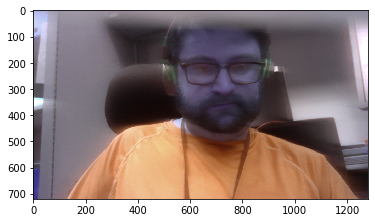

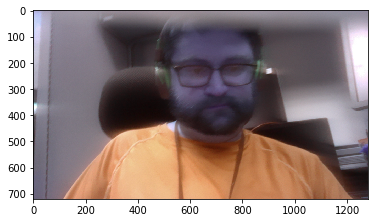

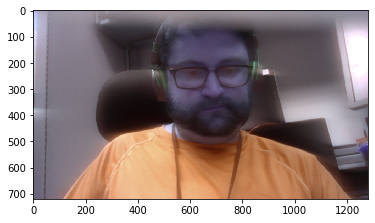

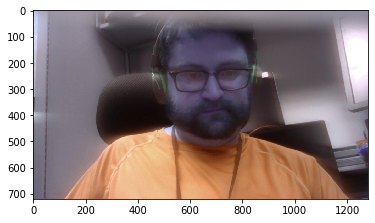

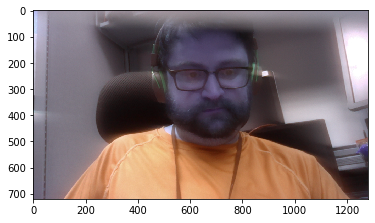

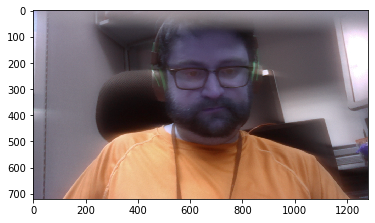

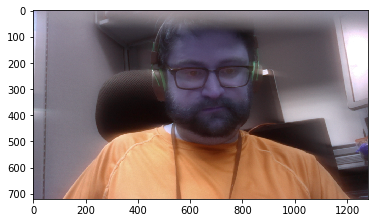

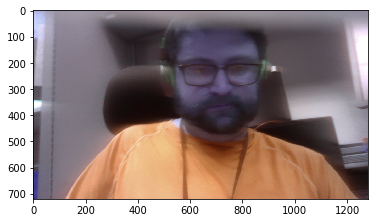

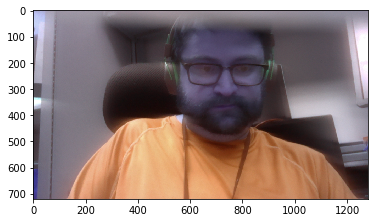

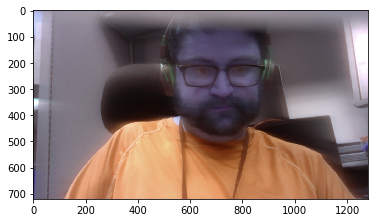

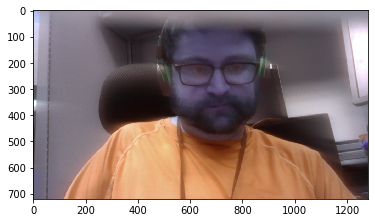

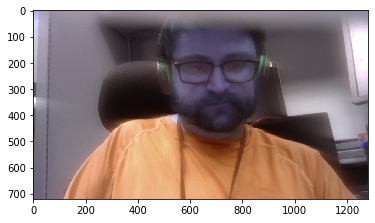

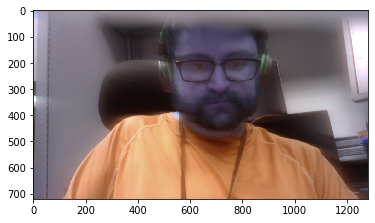

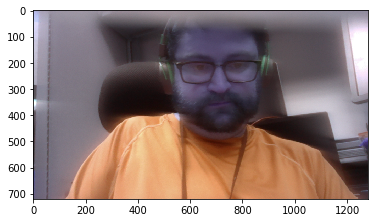

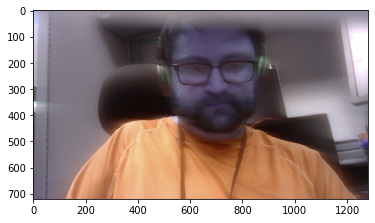

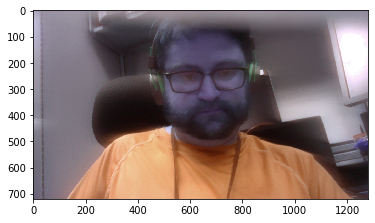

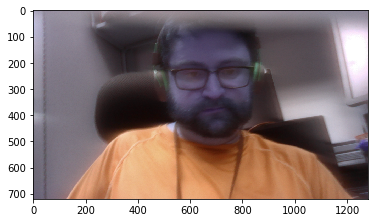

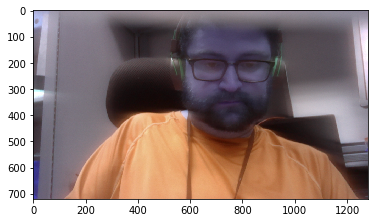

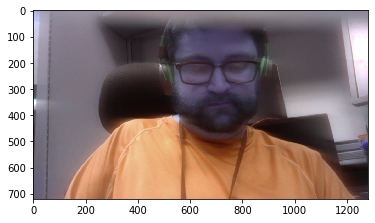

In [14]:
from nbmultitask import ThreadWithLogAndControls
task2 = ThreadWithLogAndControls(target=run_cam, name="runcam func")
task2.start()

In [ ]:
from time import sleep

# the target function will be passed a function called `thread_print`
def fn(thread_print):
    i = 1
    # be careful with loops... (in order for the stop button to work)
    while i <= 5:
        thread_print('%i...' % i)
        sleep(1.5)
        i+=1

task = ThreadWithLogAndControls(target=fn, name="do some stuff")

In [ ]:
cap.release()

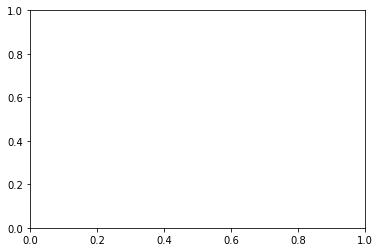

In [13]:
task2.watch()


type: One of the following: 'subscribe', 'unsubscribe', 'psubscribe', 'punsubscribe', 'message', 'pmessage'
channel: The channel [un]subscribed to or the channel a message was published to
pattern: The pattern that matched a published message's channel. Will be None in all cases except for 'pmessage' types.
data: The message data. With [un]subscribe messages, this value will be the number of channels and patterns the connection is currently subscribed to. With [p]message messages, this value will be the actual published message.

In [15]:

settings['grayscale'] = True

<Figure size 432x288 with 0 Axes>

Exception in thread runcam func:
Traceback (most recent call last):
  File "/nix/store/694wkm5rwvdf1km6q18vk2xg3kv84jmw-python3-3.8.0/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/averagehat/.local/lib/python3.8/site-packages/nbmultitask.py", line 148, in run
    fn(*self._args,**self._kwargs)
  File "<ipython-input-9-f287fac98441>", line 70, in run_cam
  File "/Users/averagehat/.local/lib/python3.8/site-packages/matplotlib/pyplot.py", line 2678, in imshow
    sci(__ret)
  File "/Users/averagehat/.local/lib/python3.8/site-packages/matplotlib/pyplot.py", line 3049, in sci
    return gca()._sci(im)
  File "/Users/averagehat/.local/lib/python3.8/site-packages/matplotlib/axes/_base.py", line 1794, in _sci
    raise ValueError("Argument must be an image, collection, or "
ValueError: Argument must be an image, collection, or ContourSet in this Axes


In [ ]:
# https://stackoverflow.com/questions/18064914/how-to-use-opencv-python-to-blur-faces

In [ ]:
image = cv2.imread(imagepath)
result_image = image.copy()

# Specify the trained cascade classifier



# Create a cascade classifier
face_cascade.load(face_cascade_name)

#Preprocess the image
grayimg = cv2.cvtColor(image, cv2.cv.CV_BGR2GRAY)
grayimg = cv2.equalizeHist(grayimg)

#Run the classifiers
faces = face_cascade.detectMultiScale(grayimg, 1.1, 2, 0|cv2.cv.CV_HAAR_SCALE_IMAGE, (30, 30))

print "Faces detected"

if len(faces) != 0:         # If there are faces in the images
    for f in faces:         # For each face in the image
    img[startX:endX, startY:endY] = cv2.blur(img[startX:endX, startY:endY], (23, 23))

        # Get the origin co-ordinates and the length and width till where the face extends
        x, y, w, h = f

        # get the rectangle img around all the faces
        cv2.rectangle(image, (x,y), (x+w,y+h), (255,255,0), 5)
        sub_face = image[y:y+h, x:x+w]
        # apply a gaussian blur on this new recangle image
        sub_face = cv2.GaussianBlur(sub_face,(23, 23), 30)
        # merge this blurry rectangle to our final image
        result_image[y:y+sub_face.shape[0], x:x+sub_face.shape[1]] = sub_face
        face_file_name = "./face_" + str(y) + ".jpg"
        cv2.imwrite(face_file_name, sub_face)


In [ ]:

#listener.unsubscribe('rpi-input')
# def handler()
from dataclasses import dataclass

@dataclass
class RGBA:
    r: float
    g: float
    b: float
    a: float
        
from typing import Tuple
        
@dataclass
class Effects:
    gray: bool
    text: str
    rgba: RGBA